# Polynomial linear regression

When data doesn't have fully linear trend.

Why still calling it 'linear regression'? We have linear coefficients, adding up to a linear sum.

In [1]:
library(caTools)
set.seed(123)
library(ggplot2)

# Getting the dataset

In [2]:
fp <- "../machine_learning_template_folder/Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv"
df <- read.csv(fp)
df <- df[2:3]
head(df)

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000


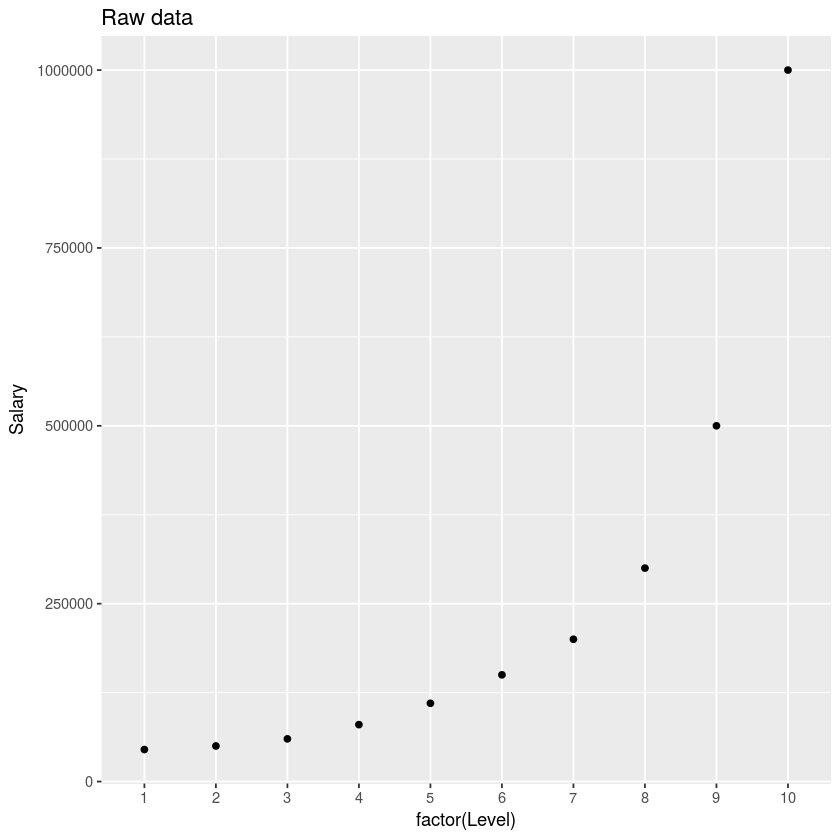

In [3]:
ggplot() + geom_point(data=df, aes(factor(Level), Salary)) + ggtitle("Raw data")

# Do the regression

## Linear regression

In [4]:
lin_reg = lm(formula=Salary~., data=df)
summary(lin_reg)


Call:
lm(formula = Salary ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


## Polynomial regression

In [6]:
df$Level2 = df$Level ^ 2
df$Level3 = df$Level ^ 3
df$Level4 = df$Level ^ 4
head(df)
poly_reg = lm(formula=Salary~., data=df, )
summary(poly_reg)
summary(lin_reg)

Level,Salary,Level2,Level3,Level4
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296



Call:
lm(formula = Salary ~ ., data = df)

Residuals:
     1      2      3      4      5      6      7      8      9     10 
 -8357  18240   1358 -14633 -11725   6725  15997  10006 -28695  11084 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  184166.7    67768.0   2.718  0.04189 * 
Level       -211002.3    76382.2  -2.762  0.03972 * 
Level2        94765.4    26454.2   3.582  0.01584 * 
Level3       -15463.3     3535.0  -4.374  0.00719 **
Level4          890.2      159.8   5.570  0.00257 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20510 on 5 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9953 
F-statistic: 478.1 on 4 and 5 DF,  p-value: 1.213e-06



Call:
lm(formula = Salary ~ ., data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-170818 -129720  -40379   65856  386545 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -195333     124790  -1.565  0.15615   
Level          80879      20112   4.021  0.00383 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 182700 on 8 degrees of freedom
Multiple R-squared:  0.669,	Adjusted R-squared:  0.6277 
F-statistic: 16.17 on 1 and 8 DF,  p-value: 0.003833


# Visualize

Using linear predictor to plot blue line. Where are values expected to fall based on linear prediction?

## Linear regression

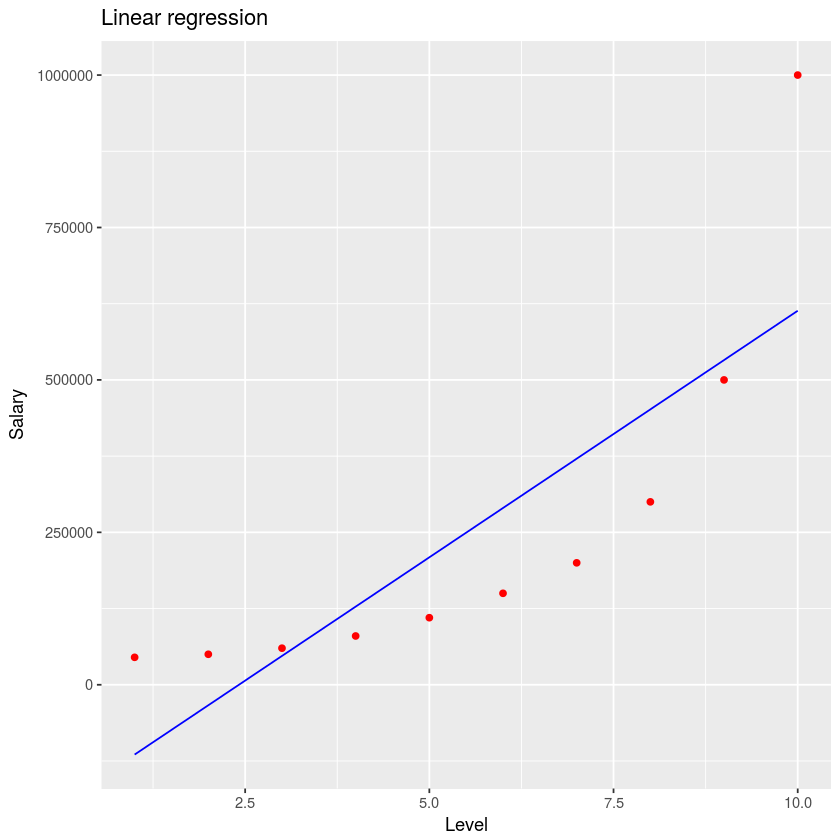

In [31]:
ggplot() + 
    geom_point(aes(x=df$Level, y=df$Salary), color='red') +
    geom_line(aes(x=df$Level, y=predict(lin_reg, newdata=df)), color='blue') +
    ggtitle("Linear regression") +
    xlab('Level') +
    ylab('Salary')

## Polynomial regression

Overfitting?

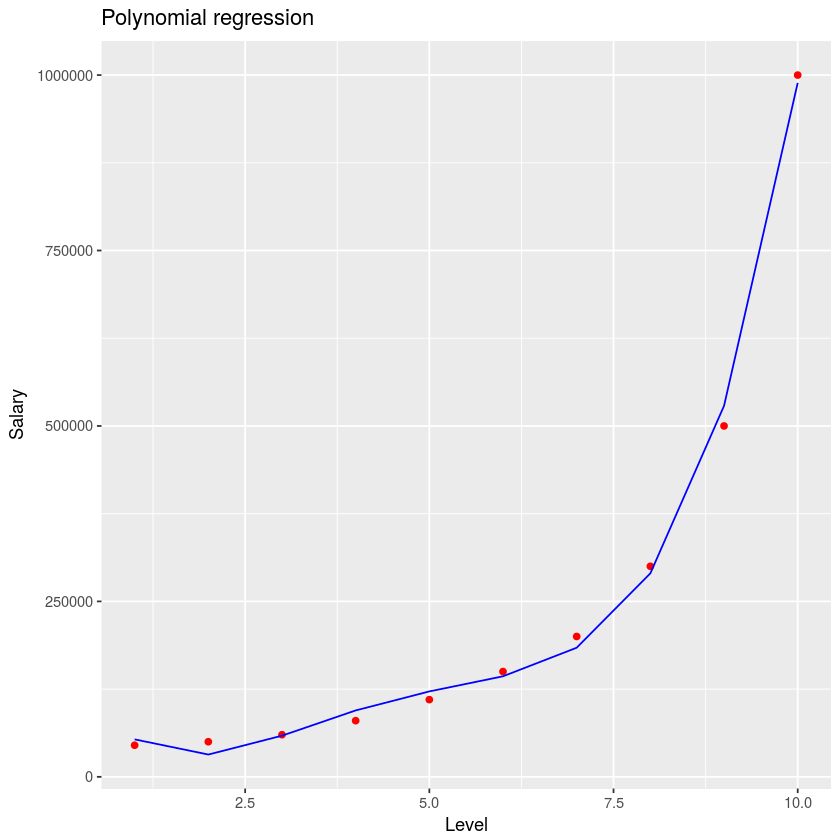

In [60]:
ggplot() + 
    geom_point(aes(x=df$Level, y=df$Salary), color='red') +
    geom_line(
        aes(x=df$Level, 
            y=predict(poly_reg, newdata=df)), 
            color='blue') +
    ggtitle("Polynomial regression") +
    xlab('Level') +
    ylab('Salary')

## Alternative approach

In [46]:
alt_poly_model <- lm(df$Salary ~ poly(df$Level, 3))
summary(alt_poly_model)


Call:
lm(formula = df$Salary ~ poly(df$Level, 3))

Residuals:
   Min     1Q Median     3Q    Max 
-75695 -28148   7091  29256  49538 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          249500      15894  15.698 4.23e-06 ***
poly(df$Level, 3)1   734618      50260  14.616 6.44e-06 ***
poly(df$Level, 3)2   446509      50260   8.884 0.000113 ***
poly(df$Level, 3)3   228980      50260   4.556 0.003868 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50260 on 6 degrees of freedom
Multiple R-squared:  0.9812,	Adjusted R-squared:  0.9718 
F-statistic: 104.4 on 3 and 6 DF,  p-value: 1.441e-05


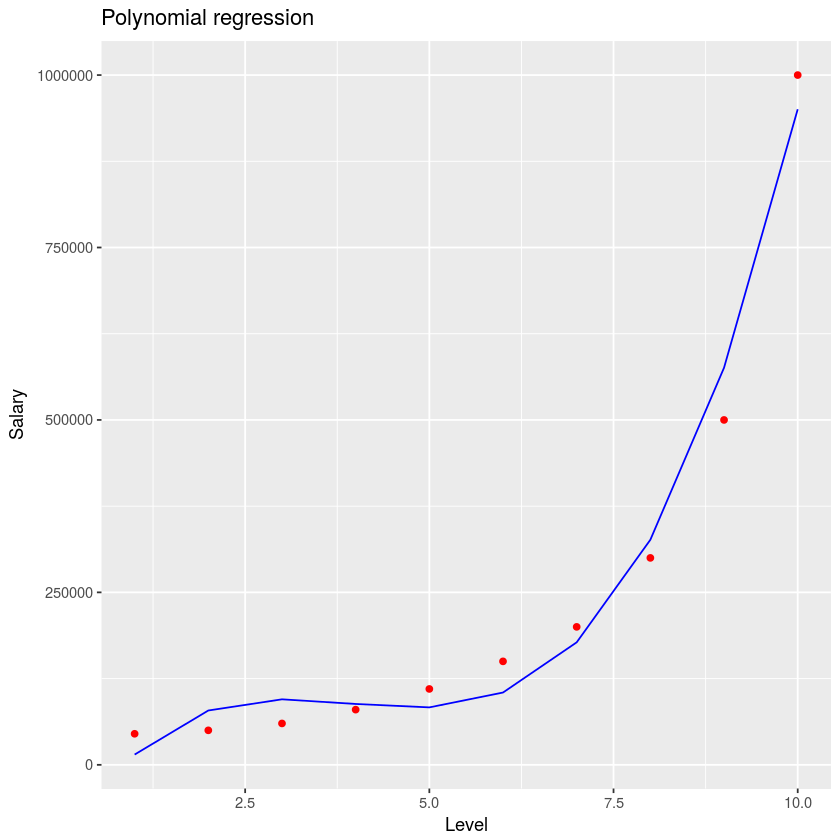

In [48]:
ggplot() + 
    geom_point(aes(x=df$Level, y=df$Salary), color='red') +
    geom_line(aes(x=df$Level, y=predict(alt_poly_model, newdata=df)), color='blue') +
    ggtitle("Polynomial regression") +
    xlab('Level') +
    ylab('Salary')

# Further regressions

Start out by doing single point prediction. Polynomial regression model performing very well here.

In [39]:
y_pred <- predict(lin_reg, data.frame(Level=6.5))
y_pred

1 
330378.8

In [42]:
y_pred_poly <- predict(poly_reg, data.frame(Level=6.5, Level2=6.5^2, Level3=6.5^3, Level4=6.5^4))
y_pred_poly

1 
158862.5